Compile and run coupled with the Catalyst runtime

Tested Fri  5 May 11:28:33 CEST 2023

In [ ]:
!./cleanup.sh

In [ ]:
!cmake -S . -B buildCatalyst -DINSITU=Catalyst

In [ ]:
!cmake --build buildCatalyst

In [1]:
!mkdir /scratch/snx3000/jfavre/Catalyst/test/images/
!srun -n 4 ./buildCatalyst/bin/pjacobi --mesh=uniform --res=64 catalyst_state.py &> /dev/null

In [2]:
%matplotlib inline

xdim 66
ydim 66


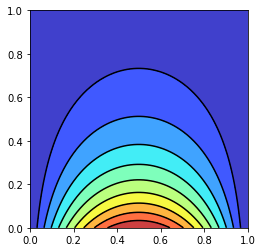

In [3]:
import numpy as np
import pylab as pl
# change filename below as appropriate
headerFilename =  "./Jacobi.bov"
headerfile = open(headerFilename, "r")
header = headerfile.readlines()
headerfile.close()

rawFilename = header[1].split()[1]

res_x, res_y = [int(x) for x in header[2].strip().split()[1:3]]
print('xdim %s' % res_x)
print('ydim %s' % res_y)

data = np.fromfile(rawFilename, dtype=np.double, count=res_x*res_y, sep='')
assert data.shape[0] == res_x * res_y, "raw data array does not match the resolution in the header"

x = np.linspace(0., 1., res_x)
y = np.linspace(0., 1.*res_y/res_x, res_y)
X, Y = np.meshgrid(x, y)

# number of contours we wish to see
V = [-0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.01]
pl.axes().set_aspect('equal')
pl.contourf(X, Y, data.reshape(res_y, res_x), V, alpha=.75, cmap='jet')
pl.contour(X, Y, data.reshape(res_y, res_x), V, colors='black')

pl.savefig("output.png", dpi=72)
pl.show()